# Boston City Budget Analysis Project

## 1. Data Processing

### Data Collection and Overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load datasets
operating_df = pd.read_csv("data/raw/operating_budget.csv")
capital_df = pd.read_csv("data/raw/capital_budget.csv")

print("Initial Data Overview")
print("\nOperating Budget Shape:", operating_df.shape)
print("Capital Budget Shape:", capital_df.shape)

print("\nOperating Budget Sample:")
display(operating_df.head())

print("\nCapital Budget Sample:")
display(capital_df.head())

Initial Data Overview

Operating Budget Shape: (943, 9)
Capital Budget Shape: (427, 23)

Operating Budget Sample:


,_id,Cabinet,Dept,Program,Expense Category,FY22 Actual Expense,FY23 Actual Expense,FY24 Appropriation,FY25 Budget
0,1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1624903.69,2374448.36,1921403.81,2217748.39
1,2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,284597.9,383743.11,219633.42,234628
2,3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,28541.55,74491.63,55573.65,60000
3,4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,19410.3,25350.83,16734.29,20000
4,5,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,16164.36,44132.61,36115,53000



Capital Budget Sample:


,_id,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Authorization_Existing,Authorization_FY,Authorization_Future,...,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget
0,1,Boston Centers for Youth and Families,BCYF Security and Technology Upgrades,Improvements to technology infrastructure and ...,Boston Centers for Youth and Families,To Be Scheduled,Citywide,2000000,0,0,...,0.0,0,0,2000000.0,0.0,0,0,0.0,0,2000000
1,2,Boston Centers for Youth and Families,BCYF Tobin Community Center Retaining Wall,Repair or replace the retaining wall adjacent ...,Public Facilities Department,In Design,Mission Hill,1800000,0,0,...,84629.0,139188,400000,1176183.0,0.0,0,0,0.0,0,1800000
2,3,Boston Centers for Youth and Families,BCYF North End Community Center,Design and construct a new North End Community...,Public Facilities Department,In Design,North End,68000000,0,0,...,9500.0,1000000,2000000,64990500.0,0.0,0,0,0.0,20000000,88000000
3,4,Boston Centers for Youth and Families,Pool Repairs,Renovate and upgrade locker rooms and pools in...,Boston Centers for Youth and Families,Annual Program,Citywide,2300000,2700000,0,...,886590.0,500000,1000000,2613410.0,0.0,0,0,0.0,0,5000000
4,5,Boston Centers for Youth and Families,Youth Budget Round 4,Engage youth across the City using participato...,Youth Engagement and Advancement,Implementation Underway,Citywide,1000000,0,0,...,28500.0,13815,0,957685.0,0.0,0,0,0.0,0,1000000


### Data Cleaning & Column Standardization

In [3]:
# Define column mappings
operating_columns = {
    "_id": "id",
    "Cabinet": "cabinet",
    "Dept": "department",
    "Program": "program",
    "Expense Category": "expense_category",
    "FY22 Actual Expense": "fy22_actual",
    "FY23 Actual Expense": "fy23_actual",
    "FY24 Appropriation": "fy24_appropriation",
    "FY25 Budget": "fy25_budget"
}

capital_columns = {
    "_id": "id",
    "Department": "department",
    "Project_Name": "project_name",
    "Scope_Of_Work": "scope_of_work",
    "PM_Department": "pm_department",
    "Project_Status": "project_status",
    "Neighborhood": "neighborhood",
    "Authorization_Existing": "authorization_existing",
    "Authorization_FY": "authorization_fy",
    "Authorization_Future": "authorization_future",
    "Grant_Existing": "grant_existing",
    "Grant_FY": "grant_fy",
    "Grant_Future": "grant_future",
    "GO_Expended": "go_expended",
    "Capital_Year_0": "capital_year_0",
    "CapitalYear_1": "capital_year_1",
    "Capital_Year_25": "capital_year_25",
    "Grant_Expended": "grant_expended",
    "Grant_Year_0": "grant_year_0",
    "Grant_Year_1": "grant_year_1",
    "GrantYear_25": "grant_year_25",
    "External_Funds": "external_funds",
    "Total_Project_Budget": "total_project_budget"
}

# Rename columns
operating_df.rename(columns=operating_columns, inplace=True)
capital_df.rename(columns=capital_columns, inplace=True)

# Convert budget columns to numeric
operating_budget_columns = ["fy22_actual", "fy23_actual", "fy24_appropriation", "fy25_budget"]
for col in operating_budget_columns:
    operating_df[col] = pd.to_numeric(operating_df[col], errors='coerce').fillna(0)

capital_budget_columns = ["authorization_existing", "authorization_fy", "authorization_future",
                         "grant_existing", "grant_fy", "grant_future", "go_expended", 
                         "capital_year_0", "capital_year_1", "capital_year_25", "grant_expended", 
                         "grant_year_0", "grant_year_1", "grant_year_25", "external_funds", 
                         "total_project_budget"]
for col in capital_budget_columns:
    capital_df[col] = pd.to_numeric(capital_df[col], errors='coerce').fillna(0)

print("Data Types After Conversion:")
print("\nOperating Budget:")
print(operating_df.dtypes)
print("\nCapital Budget:")
print(capital_df.dtypes)

Data Types After Conversion:

Operating Budget:
id                      int64
cabinet                object
department             object
program                object
expense_category       object
fy22_actual           float64
fy23_actual           float64
fy24_appropriation    float64
fy25_budget           float64
dtype: object

Capital Budget:
id                          int64
department                 object
project_name               object
scope_of_work              object
pm_department              object
project_status             object
neighborhood               object
authorization_existing      int64
authorization_fy            int64
authorization_future        int64
grant_existing              int64
grant_fy                    int64
grant_future                int64
go_expended               float64
capital_year_0              int64
capital_year_1              int64
capital_year_25           float64
grant_expended            float64
grant_year_0                int64
grant

### Feature Engineering


In [4]:
# 3. Feature Engineering

# Per Capita Calculations
boston_population = 654423

for col in operating_budget_columns:
    operating_df[f"{col}_per_capita"] = operating_df[col] / boston_population

# Calculate Growth Rates
operating_df["fy23_growth"] = ((operating_df["fy23_actual"] - operating_df["fy22_actual"]) / 
                              operating_df["fy22_actual"] * 100).replace([np.inf, -np.inf], 0)
operating_df["fy24_growth"] = ((operating_df["fy24_appropriation"] - operating_df["fy23_actual"]) / 
                              operating_df["fy23_actual"] * 100).replace([np.inf, -np.inf], 0)
operating_df["fy25_growth"] = ((operating_df["fy25_budget"] - operating_df["fy24_appropriation"]) / 
                              operating_df["fy24_appropriation"] * 100).replace([np.inf, -np.inf], 0)

# Program Level Metrics - Fixed version
program_metrics = operating_df.groupby(["department", "program"]).agg({
    "fy25_budget": ["sum", "mean", "count"]
}).reset_index()

# Flatten the column names
program_metrics.columns = ["department", "program", "total_program_budget", "avg_program_budget", "program_count"]

# Merge program metrics
operating_df = operating_df.merge(program_metrics, on=["department", "program"], how="left")

# Display results
print("Feature Engineering Results:")
print("\nSample of Per Capita Metrics:")
display(operating_df[['department', 'fy25_budget', 'fy25_budget_per_capita']].head())

print("\nSample of Growth Rates:")
display(operating_df[['department', 'fy23_growth', 'fy24_growth', 'fy25_growth']].head())

print("\nSample of Program Metrics:")
display(operating_df[['department', 'program', 'total_program_budget', 'avg_program_budget', 'program_count']].head())

# Calculate summary statistics
print("\nSummary Statistics:")
print(f"Average Per Capita Budget: ${operating_df['fy25_budget_per_capita'].mean():.2f}")
print(f"Average Growth Rate (FY25): {operating_df['fy25_growth'].mean():.1f}%")
print(f"Total Number of Programs: {len(program_metrics)}")

Feature Engineering Results:

Sample of Per Capita Metrics:


,department,fy25_budget,fy25_budget_per_capita
0,Mayor's Office,2217748.39,3.388861
1,Mayor's Office,234628.00,0.358527
2,Mayor's Office,60000.00,0.091684
3,Mayor's Office,20000.00,0.030561
4,Mayor's Office,53000.00,0.080987



Sample of Growth Rates:


,department,fy23_growth,fy24_growth,fy25_growth
0,Mayor's Office,46.128560,-19.079992,15.423337
1,Mayor's Office,34.836944,-42.765508,6.827094
2,Mayor's Office,160.993639,-25.396115,7.964836
3,Mayor's Office,30.605040,-33.989183,19.515080
4,Mayor's Office,173.024172,-18.167088,46.753427



Sample of Program Metrics:


,department,program,total_program_budget,avg_program_budget,program_count
0,Mayor's Office,Mayor's Administration,2585376.39,517075.278,5
1,Mayor's Office,Mayor's Administration,2585376.39,517075.278,5
2,Mayor's Office,Mayor's Administration,2585376.39,517075.278,5
3,Mayor's Office,Mayor's Administration,2585376.39,517075.278,5
4,Mayor's Office,Mayor's Administration,2585376.39,517075.278,5



Summary Statistics:
Average Per Capita Budget: $7.51
Average Growth Rate (FY25): 60.2%
Total Number of Programs: 230


## 3. Analysis and Visualizations

### Total Budget by Department

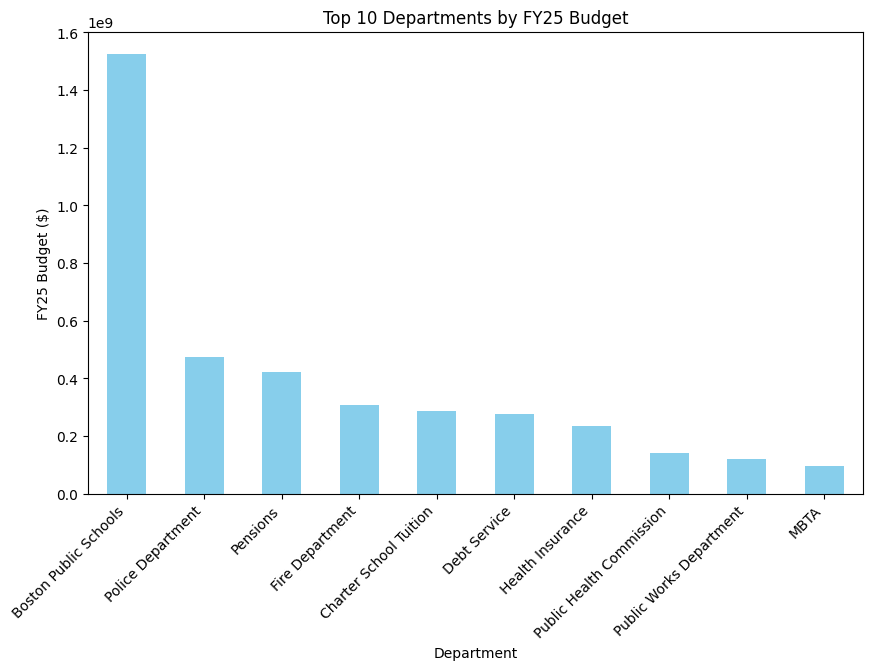

In [5]:
# Sum budget by department and get top 10 departments
top_10_departments = operating_df.groupby("department")["fy25_budget"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_10_departments.plot(kind="bar", color="skyblue")
plt.title("Top 10 Departments by FY25 Budget")
plt.xlabel("Department")
plt.ylabel("FY25 Budget ($)")
plt.xticks(rotation=45, ha="right")
plt.show()


- **Education as a Major Priority:** The Boston Public Schools department has the largest budget by a significant margin, with over $1.5 billion allocated. This indicates that education is a top priority for the city, receiving more funding than any other department. It's likely due to the high costs associated with staffing, maintaining facilities, and providing educational services to a large student population. 

- **Public Safety Investment:** The Police Department and Fire Department also receive substantial funding, with the Police Department having the second-largest budget after Boston Public Schools. This suggests a strong emphasis on public safety, as both departments are essential for maintaining law and order and providing emergency services in the city.

- **Commitment to Employee Benefits:** Pensions and Health Insurance are significant budget items, indicating the city's commitment to providing benefits for its employees, especially for retirees. These categories reflect the city's responsibility toward long-term employee welfare and benefits.

### Budget Growth Trends


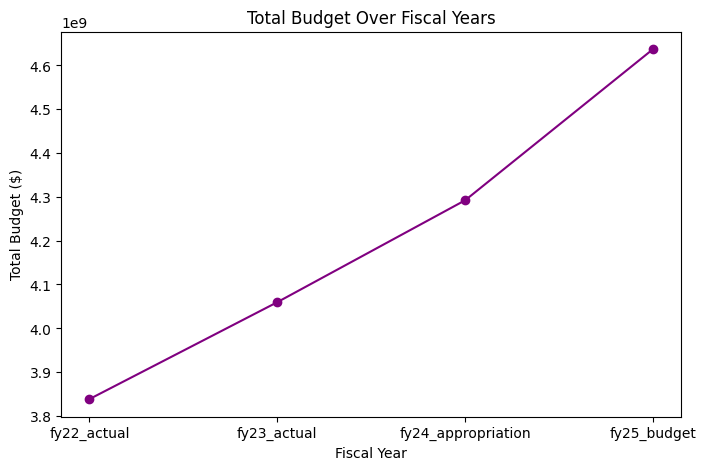

In [6]:
# Calculate total budget for each fiscal year
yearly_budget = operating_df[["fy22_actual", "fy23_actual", "fy24_appropriation", "fy25_budget"]].sum()

# Plot
plt.figure(figsize=(8, 5))
yearly_budget.plot(kind="line", marker='o', color="purple")
plt.title("Total Budget Over Fiscal Years")
plt.xlabel("Fiscal Year")
plt.ylabel("Total Budget ($)")
plt.xticks(range(len(yearly_budget.index)), yearly_budget.index)
plt.show()

This trend suggests that Boston is committed to expanding or maintaining its services to meet the needs of its population. The steady budget increase could reflect economic growth, a higher tax base, or additional federal/state funding. It may also indicate increased operational costs due to inflation or an emphasis on capital projects and social programs. This trend is crucial for future planning and budgeting, as it points to the need for sustainable revenue sources to support continuous budget growth.

### Per Capita Spending by Department

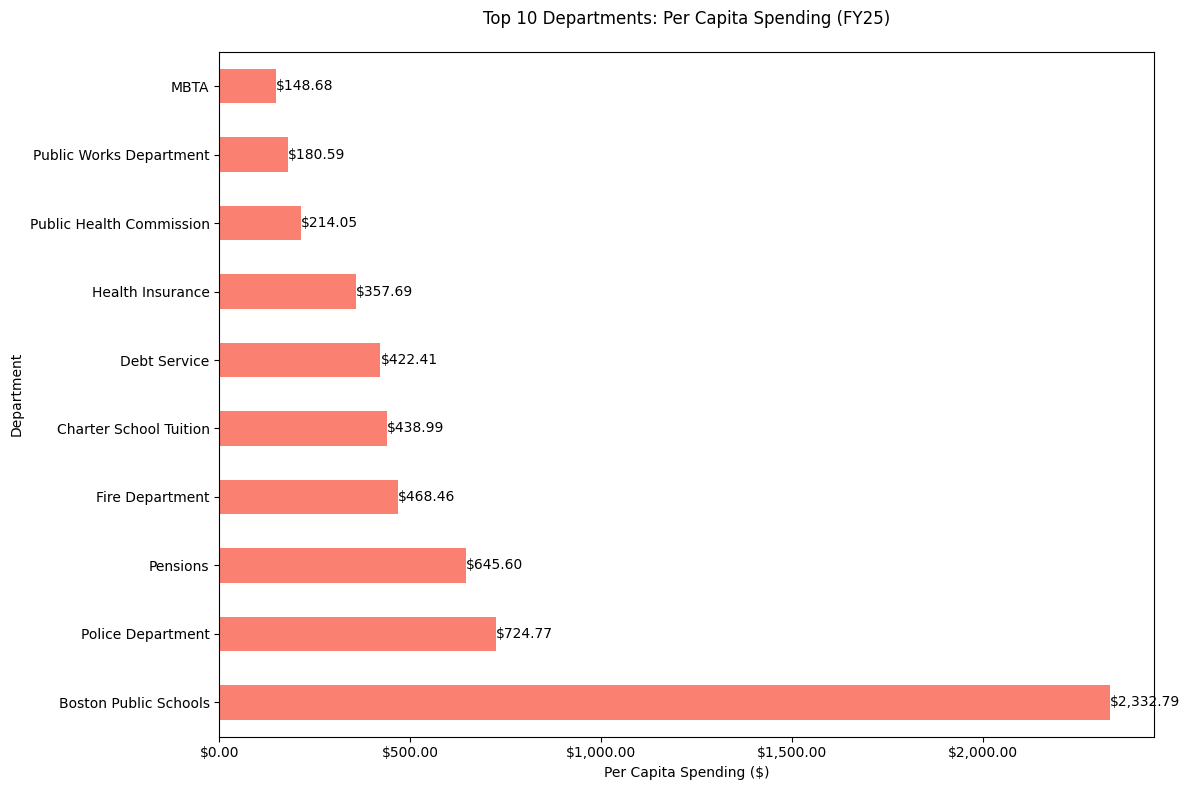


Per Capita Spending Summary:
Total Per Capita Spending: $7,085.52
Average Per Capita Spending by Department: $30.56

Top 3 Departments by Per Capita Spending:
Boston Public Schools: $2,332.79
Police Department: $724.77
Pensions: $645.60


In [7]:
# Per Capita Spending Analysis and Visualization

# Calculate per capita spending
operating_df['fy25_per_capita'] = operating_df['fy25_budget'] / boston_population

# Create visualization with formatted axis
plt.figure(figsize=(12, 8))
per_capita_by_dept = operating_df.groupby("department")['fy25_per_capita'].sum().sort_values(ascending=False).head(10)

# Create bar plot
ax = per_capita_by_dept.plot(kind="barh", color="salmon")

# Format x-axis to show dollar amounts
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.2f}'))

# Customize plot
plt.title("Top 10 Departments: Per Capita Spending (FY25)", pad=20)
plt.xlabel("Per Capita Spending ($)")
plt.ylabel("Department")

# Add value labels
for i, v in enumerate(per_capita_by_dept):
    ax.text(v, i, f'${v:,.2f}', va='center')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print summary statistics
print("\nPer Capita Spending Summary:")
print(f"Total Per Capita Spending: ${operating_df['fy25_per_capita'].sum():,.2f}")
print(f"Average Per Capita Spending by Department: ${operating_df.groupby('department')['fy25_per_capita'].mean().mean():,.2f}")
print(f"\nTop 3 Departments by Per Capita Spending:")
for dept, value in per_capita_by_dept.head(3).items():
    print(f"{dept}: ${value:,.2f}")

### Program-Level Expenditures

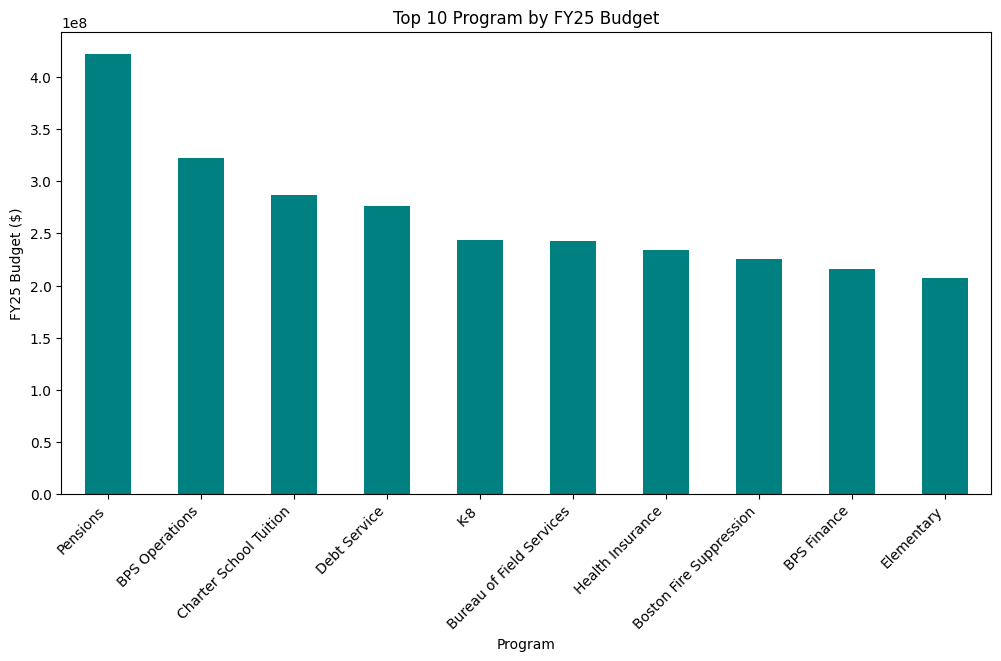

In [8]:
# Sum budget by program and get top 10
program_budget = operating_df.groupby("program")["fy25_budget"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
program_budget.plot(kind="bar", color="teal")
plt.title("Top 10 Program by FY25 Budget")
plt.xlabel("Program")
plt.ylabel("FY25 Budget ($)")
plt.xticks(rotation=45, ha="right")
plt.show()

These allocations demonstrate that Boston prioritizes a balanced approach between long-term commitments (pensions and debt), essential public services (education and public safety), and employee welfare (health insurance). This distribution provides insights into the city's focus areas and strategic spending to support community well-being and operational stability.

### Department Budget Share Pie Chart

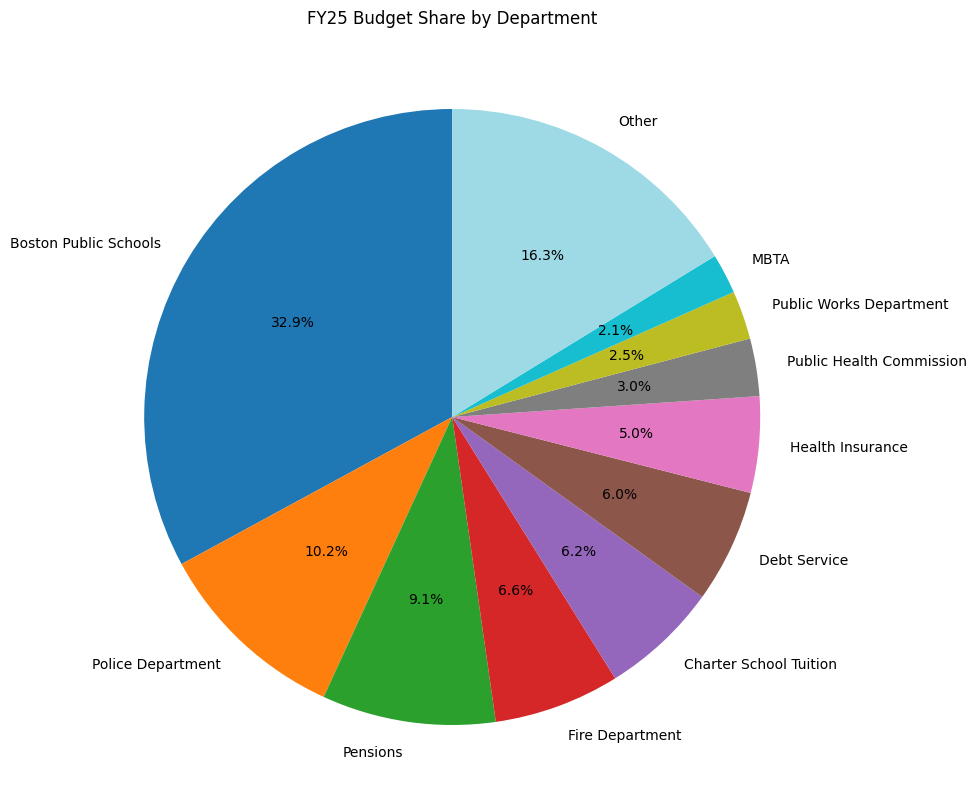

In [9]:
# Calculate the department's share of the total budget
department_budget = operating_df.groupby("department")["fy25_budget"].sum()
department_share = department_budget / department_budget.sum() * 100

# Sort by budget share and select the top 10 departments
top_10_departments_share = department_share.sort_values(ascending=False).head(10)

# Calculate the share for all other departments and add as "Other"
other_share = 100 - top_10_departments_share.sum()
top_10_departments_share["Other"] = other_share

# Plot the pie chart
plt.figure(figsize=(10, 10))
top_10_departments_share.plot(kind="pie", autopct='%.1f%%', startangle=90, cmap="tab20")
plt.title("FY25 Budget Share by Department")
plt.ylabel("")
plt.show()


- **Boston Public Schools** accounts for the largest single share of the FY25 budget at 32.9%, nearly one-third of the total budget. This substantial allocation reflects the city’s strong emphasis on education and underscores the importance of funding public schools to support Boston’s student population, educational staff, and school facilities.

- The **Police Department** holds the second-largest share at 10.2% of the total budget, followed closely by the Fire Department at 6.6%. Together, these departments receive a significant portion of the budget, indicating that public safety is a key priority for Boston. This investment supports policing, emergency response, and fire prevention services across the city.

The chart provides a visual breakdown of Boston’s budget priorities, emphasizing the city’s commitment to core services (education, safety, health) and financial obligations (pensions and debt service). This distribution highlights Boston’s balanced approach to addressing immediate public needs while managing long-term financial responsibilities.

### Clustering Programs Based on Budget Similarities

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


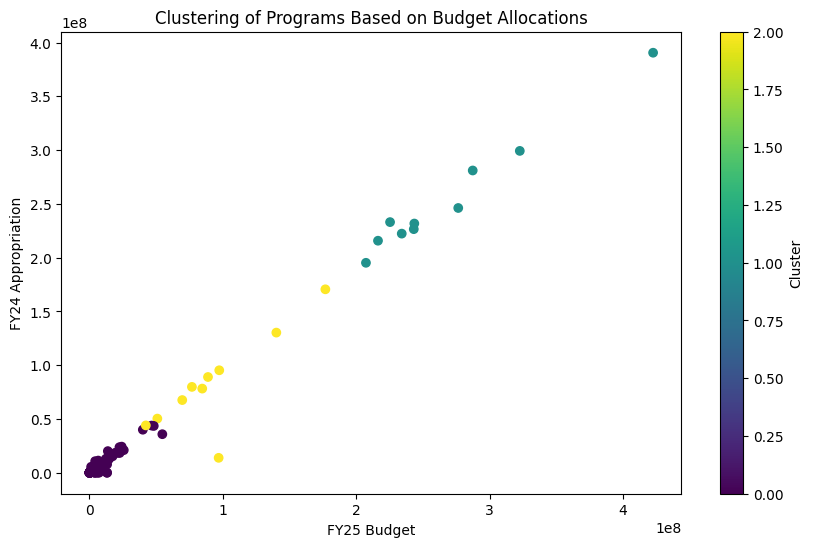

In [10]:
from sklearn.cluster import KMeans
import numpy as np

# Prepare data for clustering
program_data = operating_df.groupby("program")[["fy22_actual", "fy23_actual", "fy24_appropriation", "fy25_budget"]].sum()
program_data_normalized = (program_data - program_data.mean()) / program_data.std()

# Fit K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(program_data_normalized)
program_data["cluster"] = kmeans.labels_

# Plot clustering results
plt.figure(figsize=(10, 6))
plt.scatter(program_data["fy25_budget"], program_data["fy24_appropriation"], c=program_data["cluster"], cmap="viridis")
plt.xlabel("FY25 Budget")
plt.ylabel("FY24 Appropriation")
plt.title("Clustering of Programs Based on Budget Allocations")
plt.colorbar(label="Cluster")
plt.show()

This clustering visualization provides a clear snapshot of how the city of Boston allocates its budget across programs with different funding levels. It highlights budget stability and identifies distinct groups of programs with different funding magnitude, allowing for better-targeted planning and resource allocation. This analysis can support strategic decisions around which programs may need additional resources or restructuring in future fiscal years.

Three distinct clusters:
- Cluster 0: Contains the programs with the smallest budget allocations in both FY24 and FY25.
- Cluster 1: Represents programs with mid-range budget allocations.
- Cluster 2: Consists of high-budget programs, with some programs receiving more than $200 million in both FY24 and FY25.

Budget Consistency:
- The points are aligned closely along a line, suggesting a **positive correlation** between FY24 appropriations and FY25 budget allocations. This alignment indicates that most programs with higher budgets in FY24 tend to have similarly high allocations in FY25, reflecting budget consistency budget consistency or stability over these two years.  

## 2. Data Modeling

### Model Implementation


Model Performance Metrics:
RMSE: $270,729.96
R2 Score: 0.933
Cross-validation Score: 0.720 (+/- 0.169)


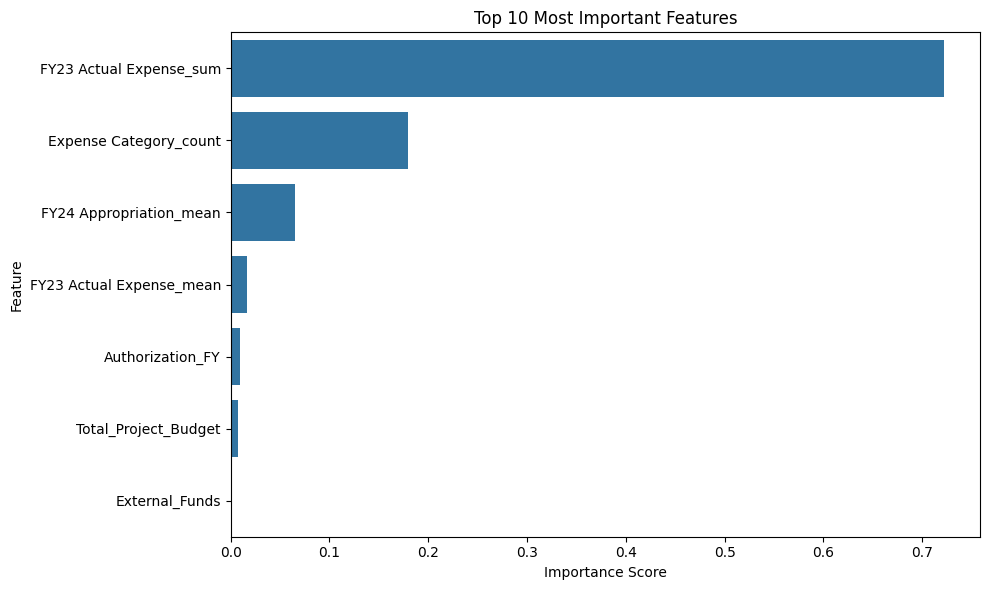

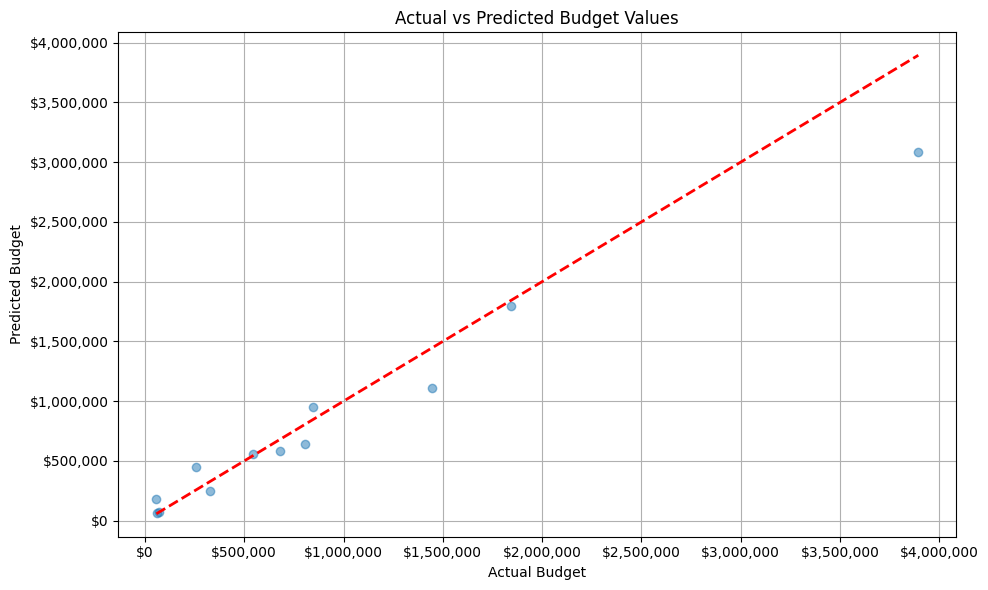


Top 5 Most Important Features:
                    Feature  Importance
1   FY23 Actual Expense_sum    0.722303
3    Expense Category_count    0.179095
0   FY24 Appropriation_mean    0.064829
2  FY23 Actual Expense_mean    0.016086
5          Authorization_FY    0.009849


In [13]:
# 4.3 Model Training and Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load and preprocess data
operating_df = pd.read_csv("data/raw/operating_budget.csv")
capital_df = pd.read_csv("data/raw/capital_budget.csv")

class BostonBudgetPredictor:
    def __init__(self):
        self.scaler = RobustScaler()
        self.rf_model = RandomForestRegressor(
            n_estimators=200,
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42
        )
        self.gb_model = GradientBoostingRegressor(
            n_estimators=200,
            learning_rate=0.05,
            max_depth=6,
            random_state=42
        )

    def preprocess_data(self, operating_df, capital_df):
        # Convert budget columns to numeric
        budget_columns = ['FY22 Actual Expense', 'FY23 Actual Expense', 
                         'FY24 Appropriation', 'FY25 Budget']
        for col in budget_columns:
            operating_df[col] = pd.to_numeric(operating_df[col], errors='coerce')

        # Remove outliers using IQR method
        for col in budget_columns:
            Q1 = operating_df[col].quantile(0.25)
            Q3 = operating_df[col].quantile(0.75)
            IQR = Q3 - Q1
            operating_df = operating_df[
                (operating_df[col] >= Q1 - 1.5 * IQR) & 
                (operating_df[col] <= Q3 + 1.5 * IQR)
            ]

        # Group by department
        dept_features = operating_df.groupby('Dept').agg({
            'FY24 Appropriation': ['sum', 'mean'],
            'FY23 Actual Expense': ['sum', 'mean'],
            'Expense Category': 'count'
        }).reset_index()

        dept_features.columns = ['_'.join(col).strip() for col in dept_features.columns.values]

        # Process capital budget
        capital_features = capital_df.groupby('Department').agg({
            'Total_Project_Budget': 'sum',
            'Authorization_FY': 'sum',
            'External_Funds': 'sum'
        }).reset_index()

        # Merge features
        combined_features = pd.merge(
            dept_features,
            capital_features,
            left_on='Dept_',
            right_on='Department',
            how='left'
        ).fillna(0)

        return combined_features

    def train_model(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        cv_scores = cross_val_score(self.rf_model, X_train_scaled, y_train, cv=5)
        
        self.rf_model.fit(X_train_scaled, y_train)
        self.gb_model.fit(X_train_scaled, y_train)
        
        rf_pred = self.rf_model.predict(X_test_scaled)
        gb_pred = self.gb_model.predict(X_test_scaled)
        ensemble_pred = 0.6 * rf_pred + 0.4 * gb_pred
        
        return {
            'rmse': np.sqrt(mean_squared_error(y_test, ensemble_pred)),
            'r2': r2_score(y_test, ensemble_pred),
            'cv_scores_mean': cv_scores.mean(),
            'cv_scores_std': cv_scores.std(),
            'y_test': y_test,
            'predictions': ensemble_pred
        }

# Initialize predictor and process data
predictor = BostonBudgetPredictor()
features = predictor.preprocess_data(operating_df, capital_df)

# Prepare features for modeling
y = features['FY24 Appropriation_sum']
feature_cols = [col for col in features.columns if col not in 
               ['Dept_', 'Department', 'FY24 Appropriation_sum']]
X = features[feature_cols]

# Train model and get results
results = predictor.train_model(X, y)

# Display performance metrics
print("\nModel Performance Metrics:")
print(f"RMSE: ${results['rmse']:,.2f}")
print(f"R2 Score: {results['r2']:.3f}")
print(f"Cross-validation Score: {results['cv_scores_mean']:.3f} (+/- {results['cv_scores_std']:.3f})")

# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': predictor.rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(results['y_test'], results['predictions'], alpha=0.5)
plt.plot([results['y_test'].min(), results['y_test'].max()], 
         [results['y_test'].min(), results['y_test'].max()], 
         'r--', lw=2)
plt.xlabel('Actual Budget')
plt.ylabel('Predicted Budget')
plt.title('Actual vs Predicted Budget Values')

# Format axis to show dollars
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.grid(True)
plt.tight_layout()
plt.show()

# Print feature importance summary
print("\nTop 5 Most Important Features:")
print(feature_importance.head().to_string())